## Supermarket sales analysis

### Step 1: Get started with importing necessary libraries

pandas - to manipulate and analyse structured data
matplotlib - to create static and interactive visualizations
seaborn - to do statistical visualizations

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Step 2: Let's load the dataset into a dataframe. 

We're calling it 'supermarket_sales'

In [39]:
supermarket_sales = pd.read_csv("supermarket.csv")

In [40]:
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Step 3: Data cleaning

Look for missing values, and nulls

In [8]:
#checks if there's null values and return true count, else false

missing_data = supermarket_sales.isnull()
for column in missing_data.columns.values.tolist():
      print (missing_data[column].value_counts())
print("")

Invoice ID
False    1000
Name: count, dtype: int64
Branch
False    1000
Name: count, dtype: int64
City
False    1000
Name: count, dtype: int64
Customer type
False    1000
Name: count, dtype: int64
Gender
False    1000
Name: count, dtype: int64
Product line
False    1000
Name: count, dtype: int64
Unit price
False    1000
Name: count, dtype: int64
Quantity
False    1000
Name: count, dtype: int64
Tax 5%
False    1000
Name: count, dtype: int64
Total
False    1000
Name: count, dtype: int64
Date
False    1000
Name: count, dtype: int64
Time
False    1000
Name: count, dtype: int64
Payment
False    1000
Name: count, dtype: int64
cogs
False    1000
Name: count, dtype: int64
gross margin percentage
False    1000
Name: count, dtype: int64
gross income
False    1000
Name: count, dtype: int64
Rating
False    1000
Name: count, dtype: int64



There are no missing values as we can see that value_counts has returned only "False" for every variable. 
Let's now understand what type of variables we have using info(). 

In [9]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Step 4: Look at the questions to answer

1. What is the total percentage of sales by each branch? 
2. What is the total percentage of sales by each product line?
3. Which product line has the most and least sales? Find this for each branch. 
4. Is there a difference in gross income by members compared to non-members? A/B test to find out.
5. What is the weekly analysis of total sales of each product line? Identify trends.
6. What is the weekly analysis of total sales of each branch? Identify trends. 
7. Determine which product lines are performing well in terms of customer ratings. 

### 1. What is the total percentage of sales by each branch? 
    
let's see what are the different branches of this supermarket.

In [4]:
branches = supermarket_sales.Branch.unique()
print(branches)

['A' 'C' 'B']


Let's find the total sales done by each branch and display them in percentages

In [5]:
branch_sales = supermarket_sales.groupby('Branch')['Total'].sum()
total_sales = branch_sales.sum()
branch_sales_percent = round((branch_sales/total_sales)*100, 2)
print(branch_sales_percent)

Branch
A    32.88
B    32.88
C    34.24
Name: Total, dtype: float64


Total sales in Branch C is high. Let's depict this in a bar graph and save the graph

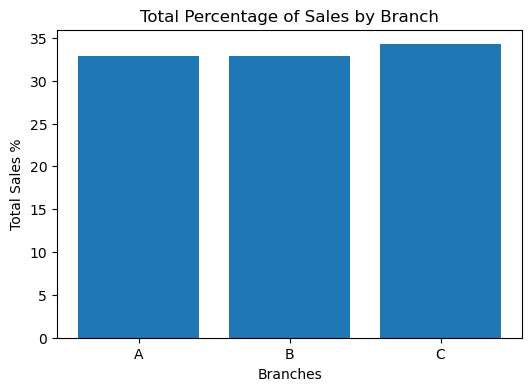

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(6,4))
ax=plt.subplot()
plt.bar(range(len(branch_sales_percent)), branch_sales_percent.values)
ax.set_xticks(range(len(branch_sales_percent)))
ax.set_xticklabels(branch_sales_percent.index)
plt.xlabel("Branches")
plt.ylabel("Total Sales %")
plt.title("Total Percentage of Sales by Branch")
plt.show()
plt.savefig('Total Sales by Branch.png')

### 2. What is the total percentage of sales by each product line?

Let's find the total sales done of each product line and display them in percentages

In [7]:
product_sales = supermarket_sales.groupby('Product line')['Total'].sum()
total_product_sales = product_sales.sum()
product_sales_percent = round((product_sales/total_product_sales)*100, 2)
print(product_sales_percent)

Product line
Electronic accessories    16.82
Fashion accessories       16.81
Food and beverages        17.38
Health and beauty         15.23
Home and lifestyle        16.68
Sports and travel         17.07
Name: Total, dtype: float64


Total sales % is high in product lines Food and beverages, sports and travel and low in Health and beauty. 
Let's visualize this table in a bar chart as well.

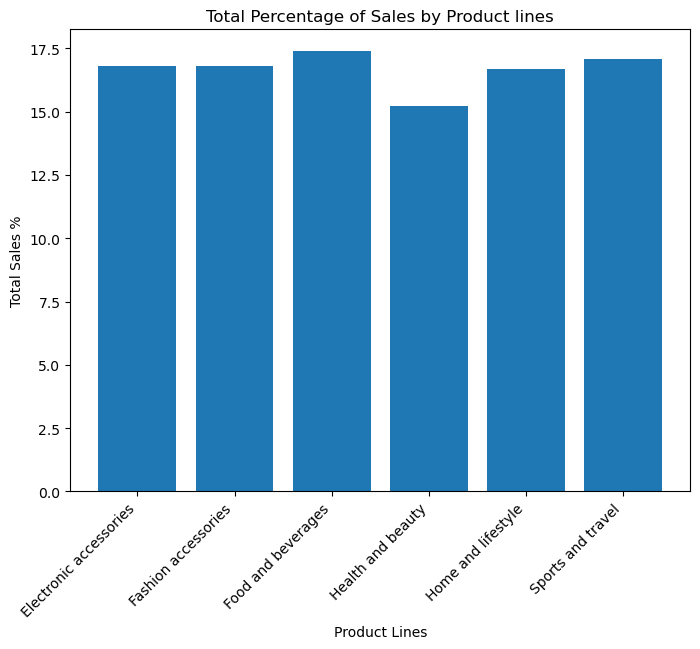

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(8,6))
ax=plt.subplot()
plt.bar(range(len(product_sales_percent)), product_sales_percent.values)
ax.set_xticks(range(len(product_sales_percent)))
ax.set_xticklabels(product_sales_percent.index, rotation=45, ha='right')
plt.xlabel("Product Lines")
plt.ylabel("Total Sales %")
plt.title("Total Percentage of Sales by Product lines")
plt.show()
plt.savefig('Total percent of sales by product lines.png')

### 3. Which product line has the most and least sales? Find this for each branch. 

We can visualize this in two ways. First, let's do a stacked bar chart. 

In [9]:
branch_product_sales = supermarket_sales.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
branch_product_sales_percent = branch_product_sales.div(branch_product_sales.sum(axis=1), axis=0) * 100
branch_product_sales_percent

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,17.247693,15.378956,16.161055,11.862250,21.108397,18.241650
B,16.056325,15.455439,14.326951,18.814593,16.524999,18.821692
C,17.155826,19.499251,21.495101,15.027151,12.567347,14.255325


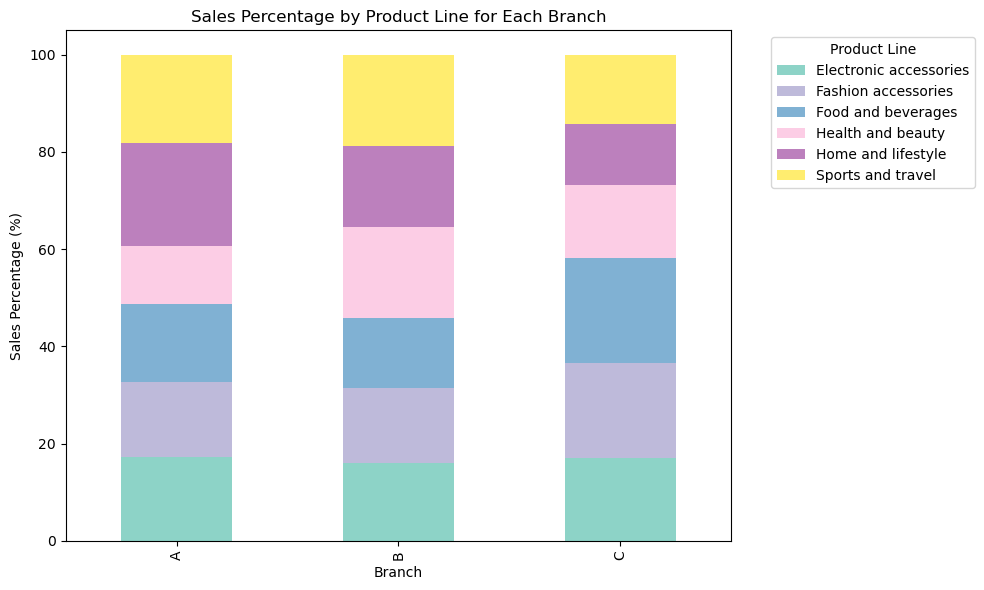

In [22]:
branch_product_sales = supermarket_sales.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
branch_product_sales_percent = branch_product_sales.div(branch_product_sales.sum(axis=1), axis=0) * 100

# Plotting
branch_product_sales_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.xlabel('Branch')
plt.ylabel('Sales Percentage (%)')
plt.title('Sales Percentage by Product Line for Each Branch')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('Sales percent by product line and branch.png')

Let's visualize the same through a heatmap using the seaborn library,

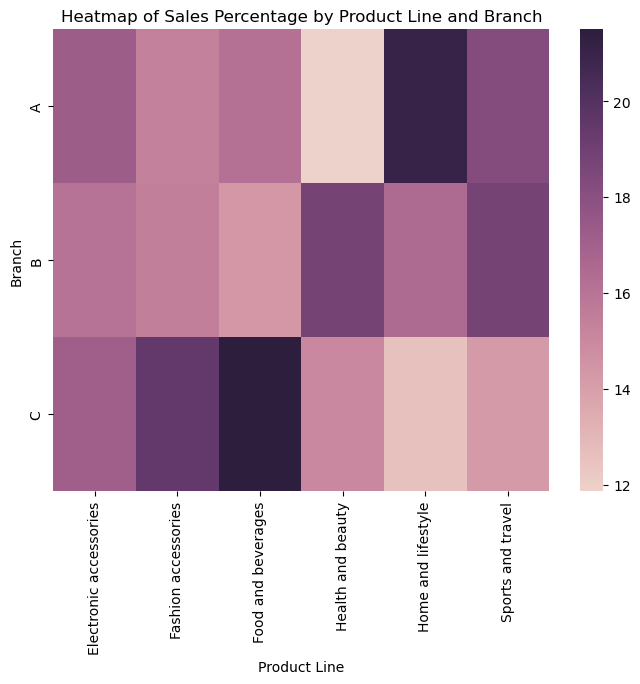

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(branch_product_sales_percent, cmap=sns.cubehelix_palette(as_cmap=True)) 

plt.xlabel('Product Line')
plt.ylabel('Branch')
plt.title('Heatmap of Sales Percentage by Product Line and Branch')
plt.show()
plt.savefig('heatmap of sales by product line and branch.png')

From this visualizations, we can see that, 

- In branch A, sales is high in Home and lifestyle, low in health and beauty
- In branch B, sales is high in Sports and travel, low in Food and beverages
- In branch C, sales is high in Food and beverages, low in Home and lifestyle

Branch A:
Most Sales: "Home and lifestyle" 
Least Sales: "Health and beauty" 
Branch B:
Most Sales: "Sports and travel", and "Health and beauty"
Least Sales: "Food and beverages" 
Branch C:
Most Sales: "Food and beverages" 
Least Sales: "Home and lifestyle" 

### 4. Is there a difference in gross income by members compared to non-members? 

Let's do A/B testing to determine gross income from Members vs. Non-Members. 

First, let's get a general understanding of the gross income generated by members and non-members


In [29]:
# Filter for members
members = supermarket_sales[supermarket_sales['Customer type'] == 'Member']['gross income']

# Filter for non-members
non_members = supermarket_sales[supermarket_sales['Customer type'] == 'Normal']['gross income']

print("Member Gross Income Statistics:")
print(members.describe())

print("\nNon-Member Gross Income Statistics:")
print(non_members.describe())

Member Gross Income Statistics:
count    501.000000
mean      15.609110
std       11.809228
min        0.508500
25%        5.631000
50%       12.668000
75%       23.122500
max       49.650000
Name: gross income, dtype: float64

Non-Member Gross Income Statistics:
count    499.000000
mean      15.148707
std       11.614419
min        0.604500
25%        6.154000
50%       11.306000
75%       22.029000
max       49.490000
Name: gross income, dtype: float64


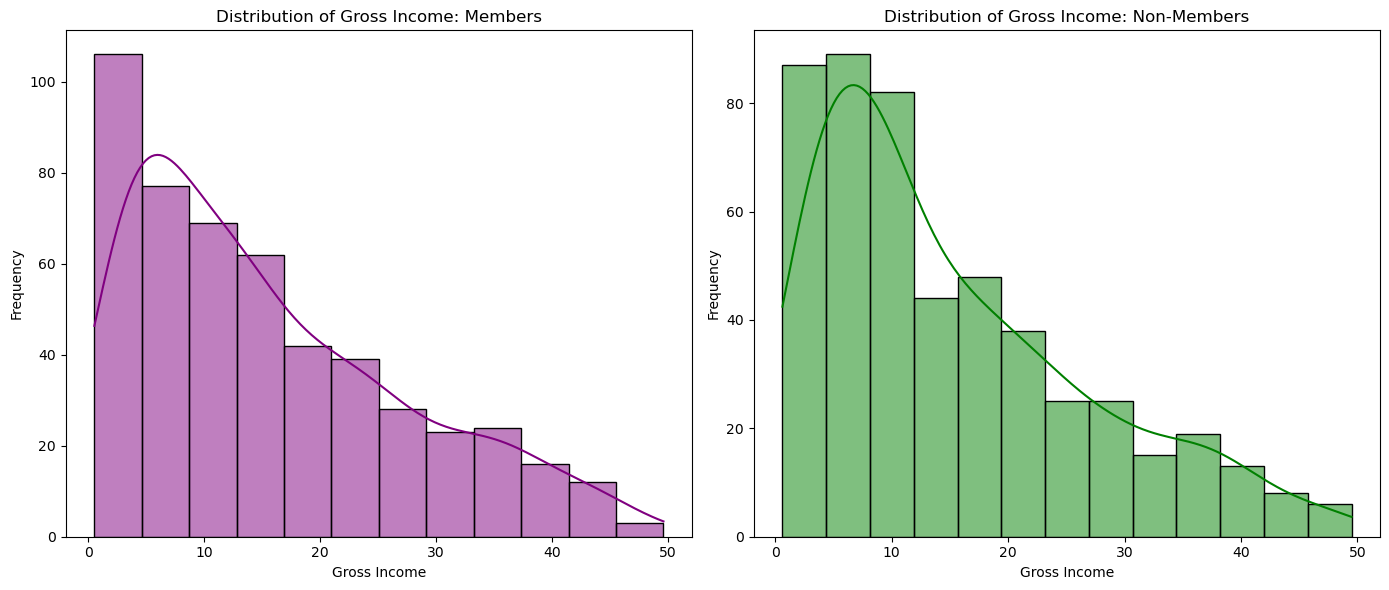

<Figure size 640x480 with 0 Axes>

In [45]:
import warnings
# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# First subplot for Members
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(members, color='purple', kde=True)
plt.title('Distribution of Gross Income: Members')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

# Second subplot for Non-Members
plt.subplot(1, 2, 2)
sns.histplot(non_members, color='green', kde=True)
plt.title('Distribution of Gross Income: Non-Members')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()
plt.savefig('histograms of distribution by customer type.png')

The gross income tends to be low for both members and non-members, with a decrease in frequency as the gross income increases.
There doesn’t appear to be a drastic difference between the two groups in terms of gross income distribution. 

Let's confirm this by A/B testing. 
Null Hypothesis (H0): There is no significant difference in the average gross income generated between members and non-members.
Alternative Hypothesis (H1): There is a significant difference in the average gross income generated between members and non-members.

In [34]:
#import stats from scipy library to perform statistical and probabilistic operations
from scipy import stats

t_stat, p_value = stats.ttest_ind(members, non_members, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.6215475684596837
P-value: 0.5343813752186685


Since the p-value is above 0.05, you fail to reject the null hypothesis. This means that, based on your data, there is no strong evidence to suggest that being a member significantly impacts the gross income generated by the customers.

In this supermarket, membership status alone does not significantly affect gross income, there could be other factors. 

### 5. What is the weekly analysis of total sales of each product line? Identify trends.

First let's do a monthly analysis and then try weekly. 

- convert the date column type to 'datetime' format 
- set date column as the index for easy resampling
- group by product line, resample by month, summing up the sales
- then, create a pivot table for easier plotting

In [41]:
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'])
supermarket_sales.set_index('Date', inplace=True)

monthly_sales = supermarket_sales.groupby('Product line')['Total'].resample('M').sum().reset_index()

monthly_sales_pivot = monthly_sales.pivot(index='Date', columns='Product line', values='Total')
monthly_sales_pivot

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Date,,,,,,
2019-01-31,18831.2880,19345.1160,19570.530,16383.1710,20494.7400,21667.0230
2019-02-28,17362.9050,19009.8615,20000.358,14602.2555,12434.3835,13809.6105
2019-03-31,18143.3385,15950.9175,16573.956,18208.3125,20932.7895,19646.1930


Let's create time-series charts for each of the branches to determine monthly sales trends.

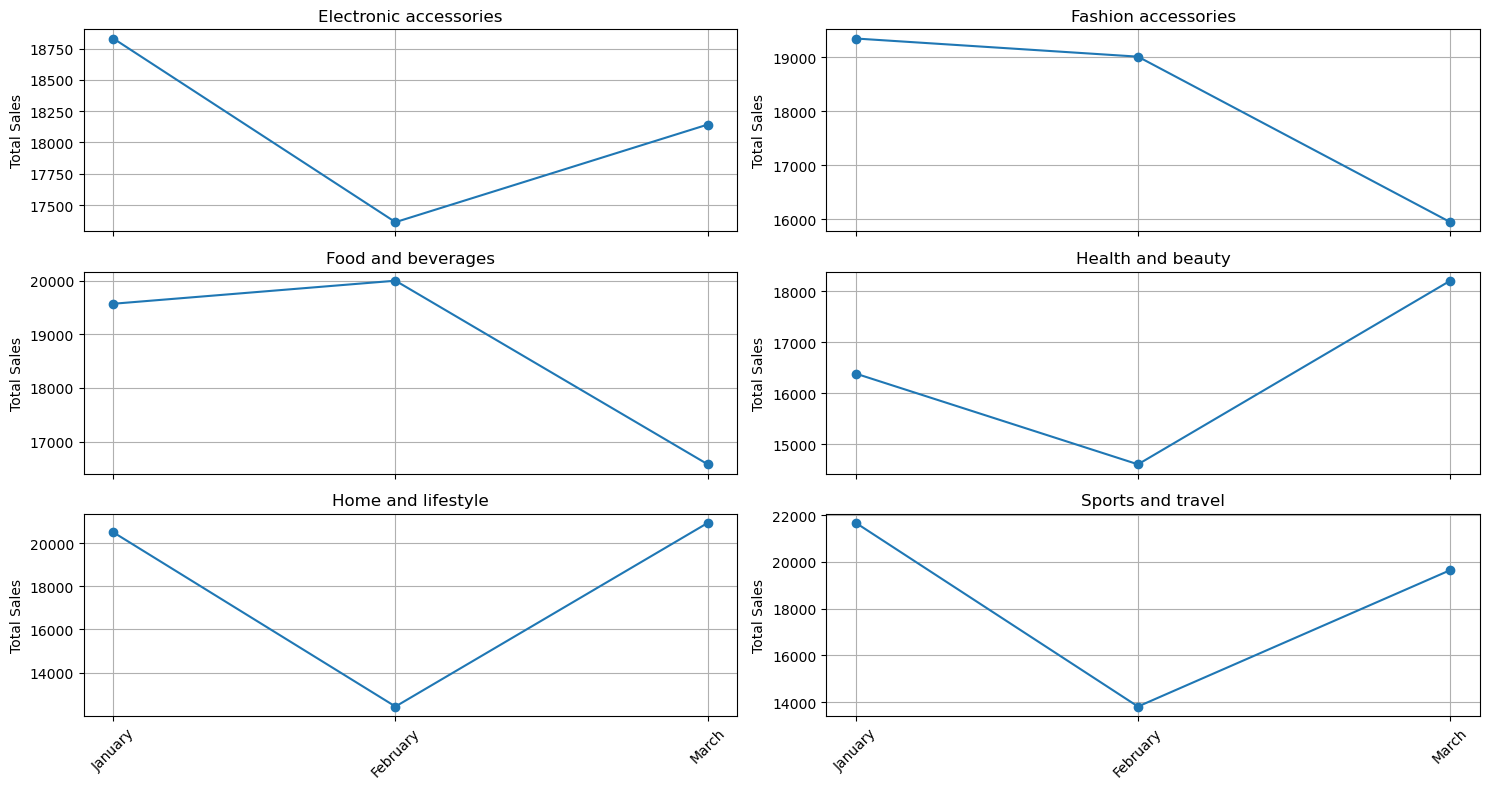

In [42]:
# Define the product lines
product_lines = monthly_sales_pivot.columns

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), sharex=True)
axes = axes.flatten()

# Loop through each product line and plot the data
for i, product in enumerate(product_lines):
    axes[i].plot(monthly_sales_pivot.index, monthly_sales_pivot[product], marker='o')
    axes[i].set_title(product)
    axes[i].set_ylabel('Total Sales')
    axes[i].grid(True)

# Format the x-axis to display months
for ax in axes:
    ax.set_xticks(monthly_sales_pivot.index)  # Set x-ticks to the dates
    ax.set_xticklabels(['January', 'February', 'March'], rotation=45)  # Set x-tick labels to month names

plt.tight_layout()
plt.show()
plt.savefig('monthly sales trends of product lines.png')

The visualizations indicate fluctuations in different product lines, with some categories experiencing consistent growth and others showing variability likely influenced by seasonal factors or marketing strategies.

Aside from Food and beverages, and Fashion accessories, all the other product lines are seeing an increase in March, compared to February. Let's now look into a deeper level by analysing weekly sales.

In [43]:
# group by product line, resample by week, summing up the sales
weekly_sales = supermarket_sales.groupby('Product line')['Total'].resample('W').sum().reset_index()

weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Product line', values='Total')
weekly_sales_pivot

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Date,,,,,,
2019-01-06,2917.0470,2682.3930,2557.7160,3720.5910,3398.8080,2266.8345
2019-01-13,4232.2035,5580.5610,4534.5720,599.1405,3892.4655,5622.2565
2019-01-20,3280.5990,3671.3985,5427.7440,2772.4410,7574.3220,5966.8560
2019-01-27,4079.8905,4038.6885,4892.3700,6716.2095,4797.8595,4761.8655
2019-02-03,4956.1575,5049.4290,5916.9810,2920.2915,3962.6475,5554.9410
2019-02-10,5098.2540,6316.7265,3441.4485,5107.1790,3938.1930,3200.0325
2019-02-17,3780.3570,5570.5755,5640.2325,3676.6170,3010.8330,3884.9790
2019-02-24,4128.1275,2594.8020,3865.8060,2049.0330,1923.2850,2767.6110
2019-03-03,7022.7465,4903.4895,4897.5990,5009.1510,4373.5020,3013.2270


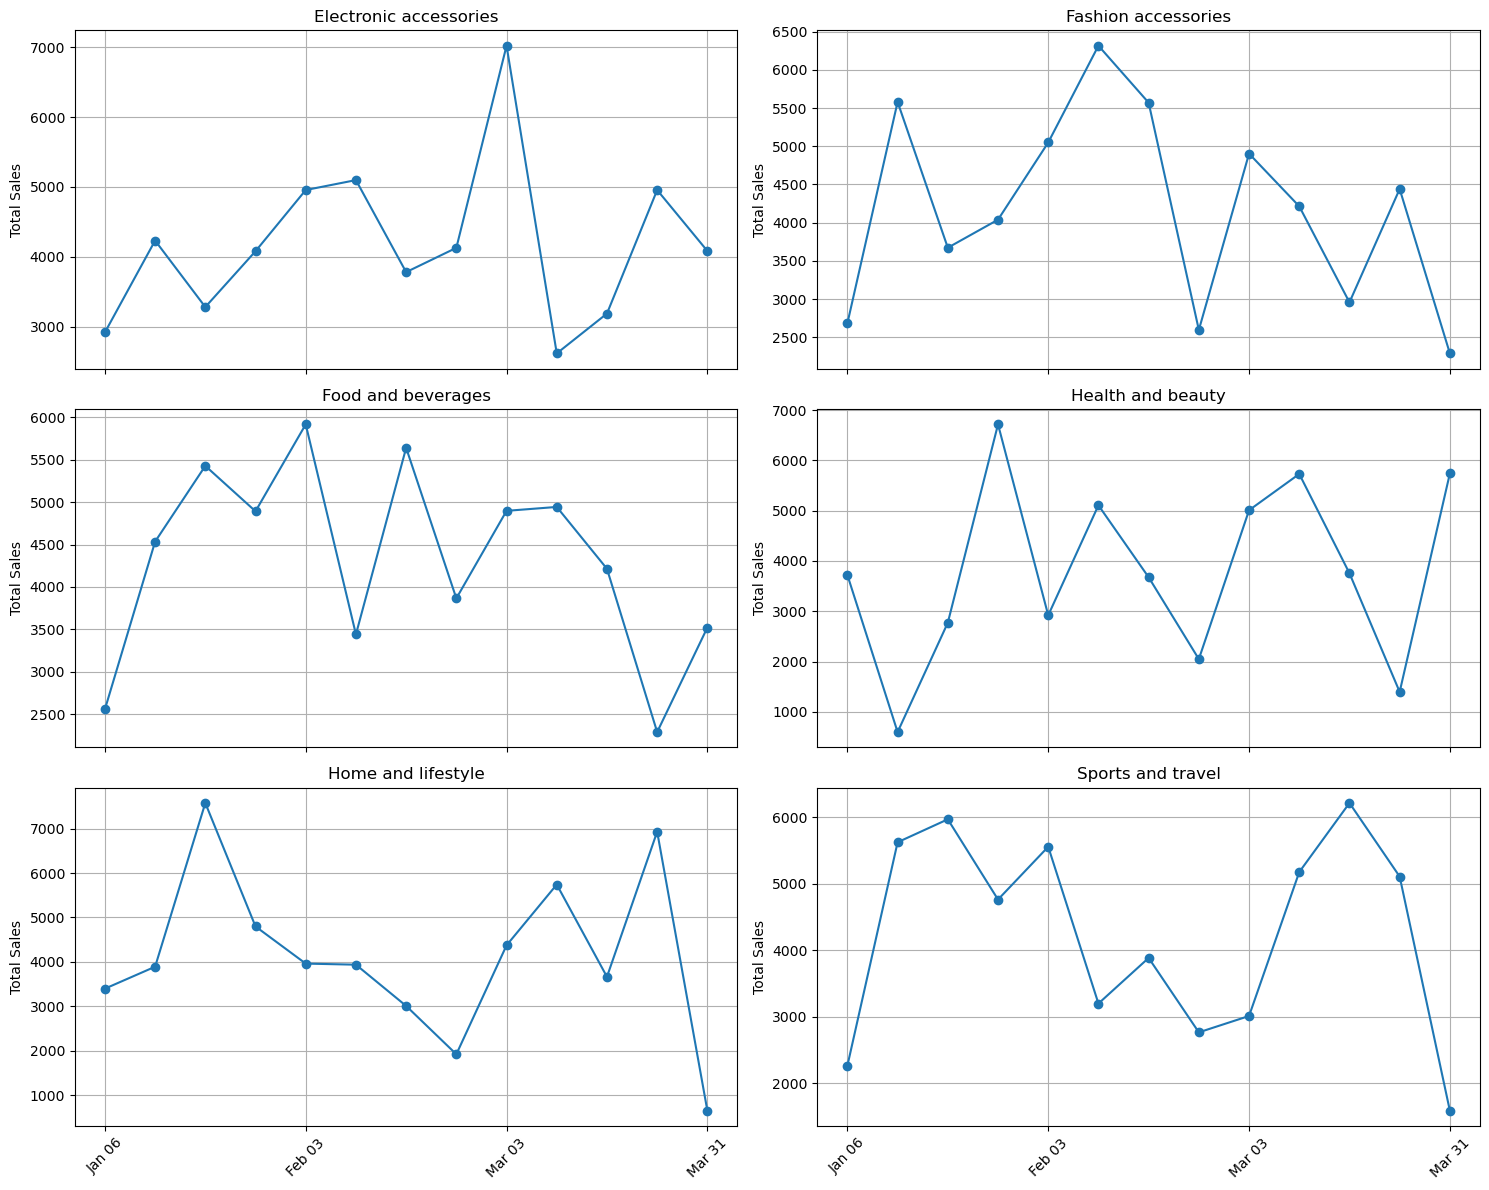

In [44]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), sharex=True)
axes = axes.flatten()

for i, product in enumerate(product_lines):
    axes[i].plot(weekly_sales_pivot.index, weekly_sales_pivot[product], marker='o')
    axes[i].set_title(product)
    axes[i].set_ylabel('Total Sales')
    axes[i].grid(True)

# Format the x-axis to display weeks
for ax in axes:
    ax.set_xticks(weekly_sales_pivot.index[::4])  # Set x-ticks to every 4 weeks (or adjust as needed)
    ax.set_xticklabels([date.strftime('%b %d') for date in weekly_sales_pivot.index[::4]], rotation=45)  # Set x-tick labels to week start dates

plt.tight_layout()
plt.show()
plt.savefig('weekly sales trends of product lines.png')

###### Electronic Accessories:
Trend: Peak in early March; high volatility.
Impact: Monitor for factors causing fluctuations and assess the effectiveness of promotions or external events.

###### Fashion Accessories:
Trend: Surge in mid-January followed by a drop in late February.
Impact: Investigate promotional activities or seasonal trends affecting sales and adjust strategies accordingly.

###### Food and Beverages:
Trend: Peak early in March; generally stable.
Impact: Ensure consistent inventory and explore reasons behind March peak to leverage strong periods.

###### Health and Beauty:
Trend: High volatility with peaks in early January and early March.
Impact: Address the causes of high fluctuations and capitalize on peak periods for targeted marketing.

###### Home and Lifestyle:
Trend: Significant drop in February with recovery in March.
Impact: Investigate factors affecting February sales and optimize inventory or marketing for recovery periods.

###### Sports and Travel:
Trend: Upward trend with peak in mid-March.
Impact: Leverage the growing demand and monitor for factors influencing February fluctuations.

### 6. What is the weekly analysis of total sales of each branch? Identify trends.

In [45]:
weekly_branch_sales = supermarket_sales.groupby('Branch')['Total'].resample('W').sum().reset_index()

weekly_branch_sales_pivot = weekly_branch_sales.pivot(index='Date', columns='Branch', values='Total')
weekly_branch_sales_pivot

Branch,A,B,C
Date,,,
2019-01-06,7433.5170,5735.1735,4374.6990
2019-01-13,6926.3460,8115.2295,9419.6235
2019-01-20,11407.3155,7072.6950,10213.3500
2019-01-27,10217.6130,8938.0935,10131.1770
2019-02-03,7345.5900,9961.6440,11053.2135
2019-02-10,7612.7205,9337.1040,10152.0090
2019-02-17,6972.8820,9710.8830,8879.8290
2019-02-24,5536.8180,5812.8420,5979.0045
2019-03-03,7188.6360,13235.9850,8795.0940


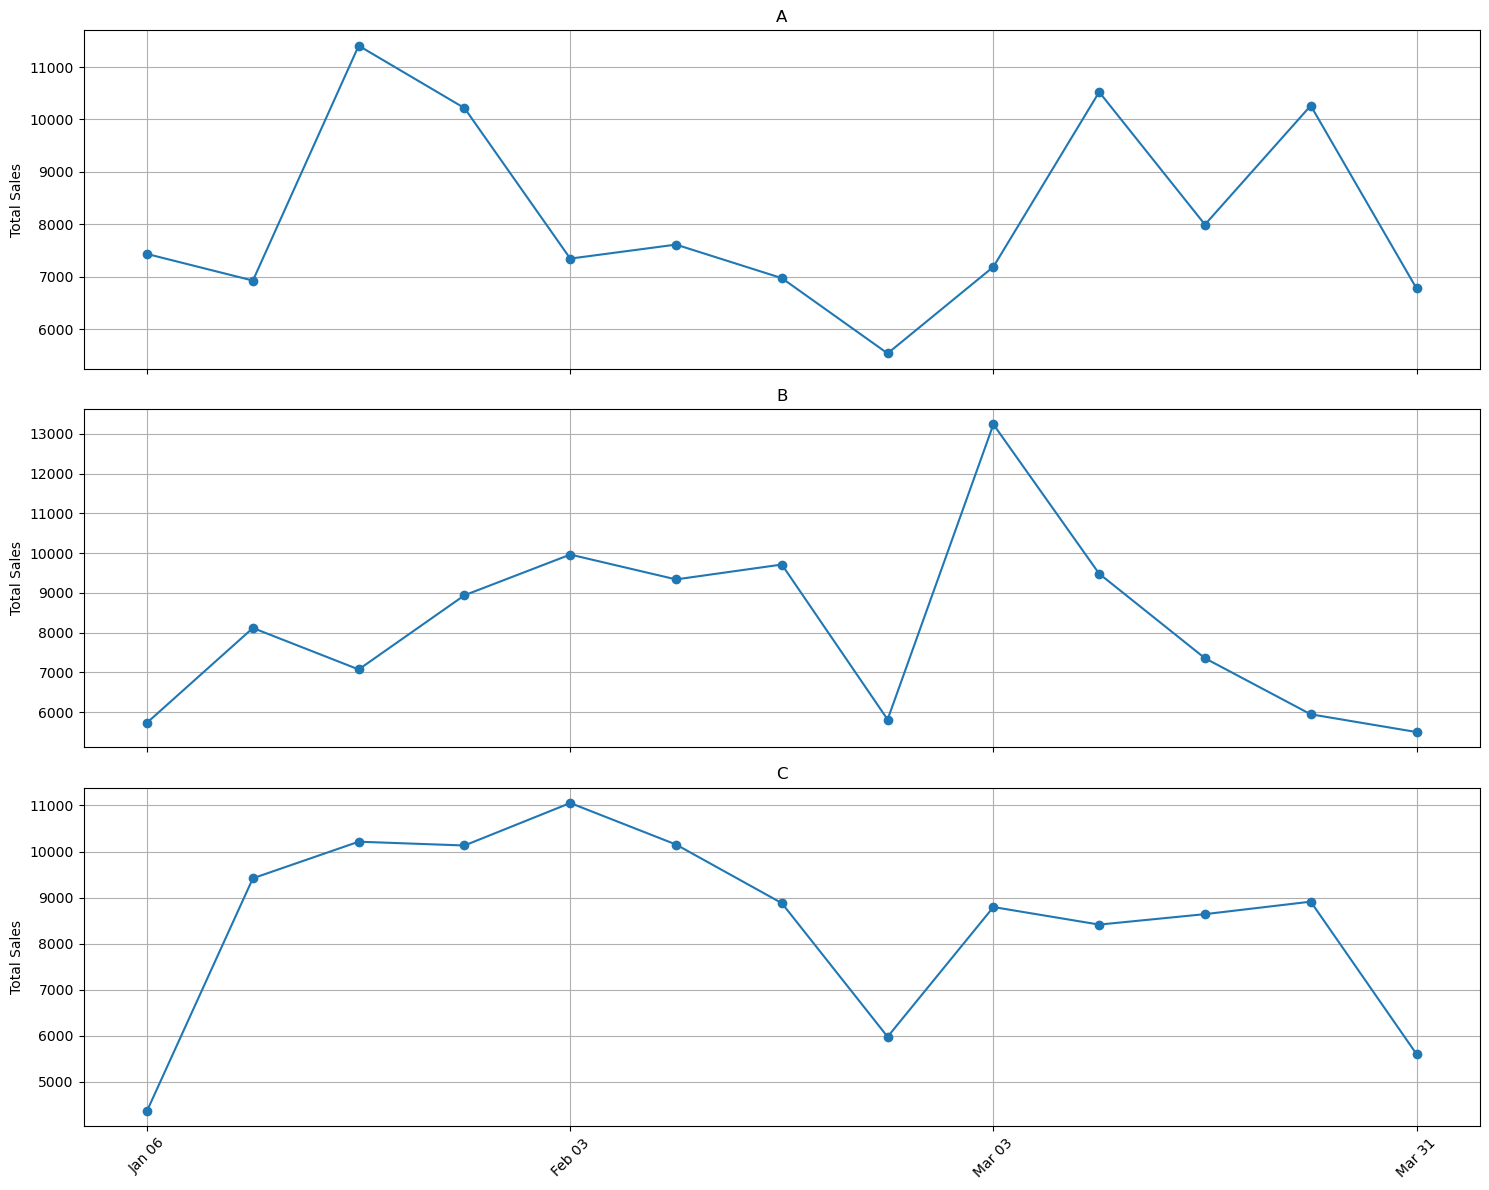

In [49]:
Branches = weekly_branch_sales_pivot.columns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)
axes = axes.flatten()

for i, bran in enumerate(Branches):
    axes[i].plot(weekly_branch_sales_pivot.index, weekly_branch_sales_pivot[bran], marker='o')
    axes[i].set_title(bran)
    axes[i].set_ylabel('Total Sales')
    axes[i].grid(True)

for ax in axes:
    ax.set_xticks(weekly_branch_sales_pivot.index[::4])  # Set x-ticks to every 4 weeks (or adjust as needed)
    ax.set_xticklabels([date.strftime('%b %d') for date in weekly_branch_sales_pivot.index[::4]], rotation=45)  # Set x-tick labels to week start dates

plt.tight_layout()
plt.show()
plt.savefig('weekly sales trends of branches.png')

Branch A: Peaks early and late March; investigate reasons for fluctuations.

Branch B: Surge in mid-January, peak in early February, decline in March; adjust strategies to address March drop.

Branch C: Steady growth with peaks in mid-January and early February; leverage growth to optimize inventory.

### 7. Determine which product lines are performing well in terms of customer ratings. 

- Round ratings to the nearest whole number
- group the number of ratings by product line

In [53]:
supermarket_sales['Rounded Rating'] = supermarket_sales['Rating'].round().astype(int)

ratings_distribution = supermarket_sales.groupby(['Product line', 'Rounded Rating']).size().unstack(fill_value=0)
ratings_distribution = ratings_distribution.reindex(columns=range(1, 11), fill_value=0)  # Ensure all ratings from 1 to 10 are present
ratings_distribution

Rounded Rating,1,2,3,4,5,6,7,8,9,10
Product line,,,,,,,,,,
Electronic accessories,0,0,0,14,24,41,24,27,23,17
Fashion accessories,0,0,0,16,24,28,38,29,24,19
Food and beverages,0,0,0,19,16,36,21,37,31,14
Health and beauty,0,0,0,15,23,25,18,35,23,13
Home and lifestyle,0,0,0,20,24,28,26,30,20,12
Sports and travel,0,0,0,18,22,35,32,21,20,18


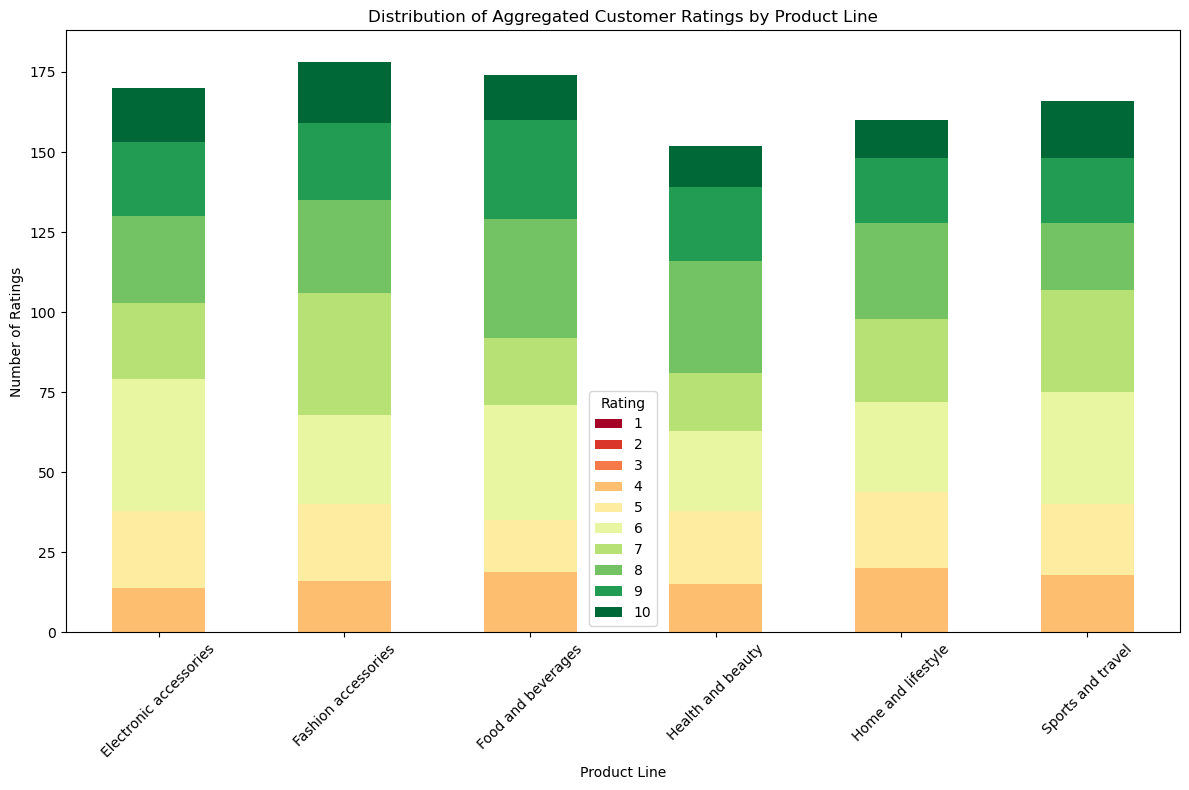

In [68]:

import matplotlib.colors as mcolors

cmap = plt.get_cmap('RdYlGn')  # Red to green colormap

# Normalize ratings to map them to the colormap
norm = mcolors.Normalize(vmin=1, vmax=10)
colors = [cmap(norm(i)) for i in range(1, 11)]

fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar chart with gradient colors
ratings_distribution.plot(kind='bar', stacked=True, ax=ax, color=colors)

ax.set_xlabel('Product Line')
ax.set_ylabel('Number of Ratings')
ax.set_title('Distribution of Aggregated Customer Ratings by Product Line')
ax.legend(title='Rating')

max_y_limit = ratings_distribution.sum(axis=1).max() + 10  # Increase limit for better visualization
ax.set_ylim(0, max_y_limit)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('distribution of cust rating by product lines.png')

- Most product lines have a similar distribution of ratings, with the majority of ratings clustering around the mid-range (4 to 8). This indicates consistent customer satisfaction across different product lines.

- Ratings of 1, 2, and 3 are non-existent across all product lines, suggesting that customers are generally satisfied.